## Telco Customer Churn — EDA

In this notebook, we explore the Telco Customer Churn dataset to understand its structure, target distribution, and key characteristics.  
This is the first step in building a predictive model for customer churn.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# --- Load dataset ---
df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Basic Info

We check the shape of the dataset, column names, and data types.

In [4]:
print("Dataset shape:", df.shape)
print("Column names:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)

Dataset shape: (7043, 21)
Column names: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


After splitting the dataset (7043 rows) into 60% training and 40% validation/test, we have approximately 4226 samples for training. With around 35 engineered features after preprocessing, this gives us a sample-to-feature ratio of ~120:1 — sufficient for training classical ML models like Logistic Regression or XGBoost.


### Missing Values and Unique Values

We identify columns with missing values or low/high cardinality.

In [5]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nUnique values per column:")
print(df.nunique())

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Unique values per column:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1

### Target Variable: Churn

Churn distribution:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


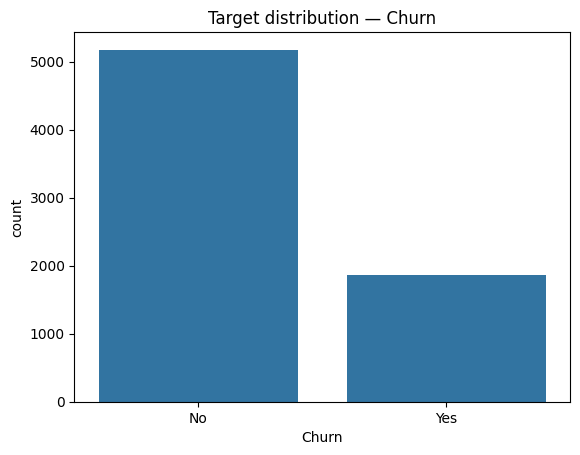

In [6]:
print("Churn distribution:")
print(df["Churn"].value_counts(normalize=True))

sns.countplot(x="Churn", data=df)
plt.title("Target distribution — Churn")
plt.show()

The target variable `Churn`  which indicates whether a customer has left (Yes) or stayed (No), is imbalanced: approximately 26.5% of the customers have churned (`Yes`) and 73.5% have not (`No`).  
This class imbalance should be taken into account when training the model — for example, by using stratified splitting and considering resampling techniques or class weights during training.


### Categorical Features

We examine some key categorical columns such as `Contract`, `InternetService`, and `PaymentMethod`.

In [7]:
cat_cols = ["Contract", "InternetService", "PaymentMethod", "gender", "SeniorCitizen"]

for col in cat_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


Contract value counts:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

InternetService value counts:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

PaymentMethod value counts:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

gender value counts:
gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen value counts:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


### Numeric Summary

Let's take a look at the basic statistics of numerical features.

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Feature Analysis & Planning

We analyze selected key features and outline a plan for feature preprocessing.


In [11]:
# --- Selected key columns for analysis ---
key_cols = ['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'Contract']

for col in key_cols:
    print(f"\n🔹 {col} value counts:")
    print(df[col].value_counts(dropna=False))



🔹 gender value counts:
gender
Male      3555
Female    3488
Name: count, dtype: int64

🔹 SeniorCitizen value counts:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

🔹 tenure value counts:
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

🔹 MonthlyCharges value counts:
MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

🔹 Contract value counts:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


### Initial Feature Observations

- `gender`: binary categorical — can be encoded as 0/1  
- `SeniorCitizen`: currently numeric (0/1), but represents a binary category  
- `tenure`: numerical — may benefit from scaling or binning  
- `MonthlyCharges`: numerical — can be used as-is or normalized  
- `Contract`: categorical with multiple levels — will require one-hot encoding  

Additional notes:
- `TotalCharges` appears to be numeric, but may contain non-numeric values — needs to be converted explicitly.  
- We will use stratified splitting to handle class imbalance.

## Summary of EDA

- There are **no missing values** in the dataset.
- Many features are **categorical** and will require appropriate encoding (e.g., one-hot or label encoding).
- The target variable `Churn` is **imbalanced** (~26.5% churn rate), which must be considered during both data splitting and model training (e.g., stratified sampling, class weighting).
- Numerical features such as `tenure`, `MonthlyCharges`, and `TotalCharges` may require normalization or special treatment.

➡️ In the next step, we will preprocess the features, split the data into train/validation/test sets, and train a baseline model.
